In [2]:
import os 
os.getcwd()

'C:\\Users\\LENOVO\\Desktop\\PYTHON\\VERİ BİLİMİ\\veri_on_isleme\\veri_on_isleme'

In [3]:
os.chdir("C:\\Users\\LENOVO\\Desktop\\PYTHON\\VERİ BİLİMİ\\bootcamp_ödev_finans_verisi")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

data = pd.read_excel("HW_Data_Set.xlsx")

In [5]:
data.head(5)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


Veri setimizde 3 adet object değişken olduğunu görüyoruz.
Şimdi hangi değişkenlerimizin kategorik olduğuna bakalım.

In [7]:
cat_data = data.select_dtypes(include = ["object"])

In [8]:
cat_data.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [9]:
cat_data.ind_109.unique()

array(['GREEN', 'RED'], dtype=object)

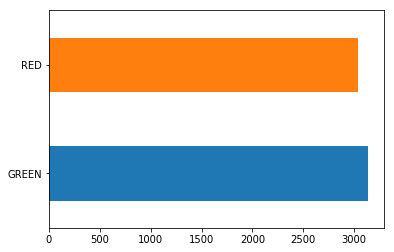

In [10]:
data["ind_109"].value_counts().plot.barh();

In [11]:
# Veri setinin hikayesini bilmediğim için şimdilik object değişkenleri siliyorum.
# Bu object değişkenler önemli değişkenler de olabilir.

col = ['ind_109','ind_420', 'ind_422']
data.drop(col, inplace=True, axis=1)
data.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805


In [12]:
# Eksik değer kontrolü.

data.isnull().values.any()

False

In [13]:
data.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.989945,0.543246,-0.533328,0.649225,0.822255,0.768234,-0.014502,-0.026336,-0.041130,...,0.620106,-0.694619,-0.304134,-0.620099,0.076169,0.626439,0.817302,0.060969,0.068989,0.060428
ind_6,0.989945,1.000000,0.514222,-0.495572,0.608947,0.768551,0.713870,-0.006066,-0.019393,-0.035795,...,0.634679,-0.646983,-0.279922,-0.569657,0.021220,0.567359,0.810371,0.062101,0.069652,0.061560
ind_8,0.543246,0.514222,1.000000,-0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.275687,-0.489596,-0.277258,-0.432579,0.144795,0.593799,0.445427,-0.004126,0.006984,-0.006650
ind_9,-0.533328,-0.495572,-0.374857,1.000000,-0.829576,-0.609288,-0.568581,0.238938,0.240048,0.152133,...,-0.276882,0.436275,0.349318,0.505772,-0.173139,-0.631961,-0.450719,-0.031316,-0.004053,0.012093
ind_10,0.649225,0.608947,0.828650,-0.829576,1.000000,0.719409,0.633753,-0.046312,-0.060849,-0.068450,...,0.333229,-0.558311,-0.377913,-0.565931,0.191752,0.739227,0.540428,0.016423,0.006654,-0.011307
ind_12,0.822255,0.768551,0.583623,-0.609288,0.719409,1.000000,0.917026,-0.023687,-0.020730,-0.018741,...,0.499789,-0.710854,-0.387471,-0.724635,0.385101,0.776076,0.807595,0.042550,0.055045,0.043786
ind_13,0.768234,0.713870,0.482220,-0.568581,0.633753,0.917026,1.000000,-0.117867,-0.120047,-0.104645,...,0.448225,-0.763233,-0.325331,-0.577594,0.354028,0.700736,0.727899,0.041289,0.048302,0.043491
ind_14,-0.014502,-0.006066,0.162635,0.238938,-0.046312,-0.023687,-0.117867,1.000000,0.839642,0.662691,...,-0.001524,0.263769,0.037185,-0.201515,-0.011056,-0.066201,0.021970,0.015320,0.072728,0.077710
ind_15,-0.026336,-0.019393,0.139612,0.240048,-0.060849,-0.020730,-0.120047,0.839642,1.000000,0.858916,...,-0.011403,0.344676,0.036179,-0.279639,-0.010548,-0.066437,0.016318,0.012012,0.084561,0.088271
ind_16,-0.041130,-0.035795,0.038862,0.152133,-0.068450,-0.018741,-0.104645,0.662691,0.858916,1.000000,...,-0.025170,0.432155,0.023764,-0.362005,-0.013790,-0.051049,0.010361,0.026881,0.101774,0.108077


Basit Lineer Regresyon için hedef değişkenimi 90_target belirledim ve hedef değişken ile en yüksek uyumda olan değişkenlerimi alacak şekilde datamı drop edeceğim.

In [14]:
l = data.iloc[:, 20:130]
l

,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,...,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428
0,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,...,-44,-23,-27,0.002371,2.0,-49.6,-54,1.000000,0.498547,0.701906
1,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,...,-48,-16,-31,0.003074,0.8,-55.6,-60,1.000000,0.537088,0.690833
2,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,...,-48,-10,-30,0.003561,2.7,-58.4,-60,1.000000,0.615169,0.693040
3,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,...,-51,-10,-30,0.004366,0.9,-61.8,-65,1.000000,0.661517,0.673418
4,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,...,-70,-24,-45,0.004198,0.1,-79.8,-86,1.000000,0.747204,0.700522
5,66.666667,100.720013,118.537982,148.532148,186.019179,201.931930,195.467854,188.316882,228.751455,228.992445,...,-66,-14,-37,0.005395,8.8,-78.1,-84,1.000000,0.794403,0.730549
6,66.666667,79.057155,108.756733,129.342855,162.249935,187.603903,188.576619,184.097335,223.798458,229.258543,...,-63,-5,-29,0.005749,12.8,-71.7,-84,1.000000,0.854144,0.746727
7,-66.666667,24.398625,75.604230,95.655199,121.731488,151.596862,161.309112,162.067112,202.866184,215.404916,...,-58,3,-19,0.005111,15.5,-69.0,-81,0.432099,0.832974,0.723536
8,-66.666667,-88.400901,46.758599,74.932939,96.258232,127.769547,142.632916,146.513882,188.153517,205.847845,...,-49,10,-7,0.004135,21.8,-62.7,-75,0.000000,0.908407,0.705342
9,-66.666667,-99.458395,27.463194,62.329956,81.015779,112.051436,129.652397,135.843212,177.901482,199.401685,...,-49,5,-4,0.004095,19.9,-64.6,-77,0.000000,0.833898,0.690449


In [15]:
data_orj = data.copy()
data.drop(l, axis = 1, inplace = True) # inplace True oluğunda sildiği indexi df'e kaydediyor. Yukarda etmemişti.
data.head(5)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,15,13,1,56,0.002690,-0.002670,0.000010,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,11,11,1,63,0.002729,-0.003111,-0.000191,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,15,9,-1,65,0.002780,-0.003530,-0.000375,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,18,8,0,68,0.002679,-0.003961,-0.000641,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,23,10,10,91,0.003986,-0.004624,-0.000319,-15.179065,-35.727079,-37.103503


In [16]:
drop_value = data.iloc[:, 12:20]

In [17]:
data.drop(drop_value, axis = 1, inplace = True)
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,-15.179065,-35.727079,-37.103503


In [18]:
data.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,20_target,50_target,90_target
ind_5,1.000000,0.989945,0.543246,-0.533328,0.649225,0.822255,0.768234,-0.014502,-0.026336,-0.041130,-0.049929,0.067261,0.060969,0.068989,0.060428
ind_6,0.989945,1.000000,0.514222,-0.495572,0.608947,0.768551,0.713870,-0.006066,-0.019393,-0.035795,-0.046324,0.061331,0.062101,0.069652,0.061560
ind_8,0.543246,0.514222,1.000000,-0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,-0.065919,-0.012341,-0.004126,0.006984,-0.006650
ind_9,-0.533328,-0.495572,-0.374857,1.000000,-0.829576,-0.609288,-0.568581,0.238938,0.240048,0.152133,0.035504,-0.127658,-0.031316,-0.004053,0.012093
ind_10,0.649225,0.608947,0.828650,-0.829576,1.000000,0.719409,0.633753,-0.046312,-0.060849,-0.068450,-0.061141,0.069646,0.016423,0.006654,-0.011307
ind_12,0.822255,0.768551,0.583623,-0.609288,0.719409,1.000000,0.917026,-0.023687,-0.020730,-0.018741,-0.015359,0.110571,0.042550,0.055045,0.043786
ind_13,0.768234,0.713870,0.482220,-0.568581,0.633753,0.917026,1.000000,-0.117867,-0.120047,-0.104645,-0.088647,0.091442,0.041289,0.048302,0.043491
ind_14,-0.014502,-0.006066,0.162635,0.238938,-0.046312,-0.023687,-0.117867,1.000000,0.839642,0.662691,0.571462,0.238631,0.015320,0.072728,0.077710
ind_15,-0.026336,-0.019393,0.139612,0.240048,-0.060849,-0.020730,-0.120047,0.839642,1.000000,0.858916,0.744171,0.321320,0.012012,0.084561,0.088271
ind_16,-0.041130,-0.035795,0.038862,0.152133,-0.068450,-0.018741,-0.104645,0.662691,0.858916,1.000000,0.921295,0.429029,0.026881,0.101774,0.108077


Object değişkenleri silerek onlar üzerinde herhangi bir işlem yapmadan ( " label encoder, dummy vb.") ortaya çıkan korelasyon tablomda hedef değişkenime(90_target) en uyumlu değişken ind_18
Bu yüzden basit lineer regresyonda ind_18 üzerinden gideceğim.

Grafikten anlaşılan pek normal bir dağılım olmadığı üzerine bir de test edelim

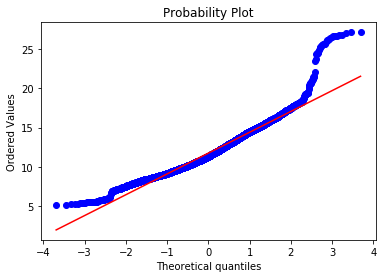

In [19]:
import statsmodels.api as sm
import pylab
import scipy.stats as stats

stats.probplot(data["ind_18"],dist = "norm" , plot = pylab) # normal probability plot
pylab.show()


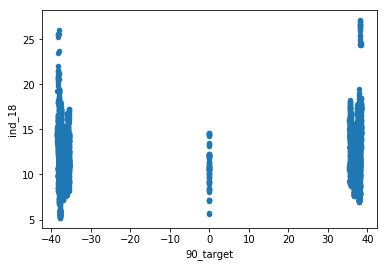

In [20]:
data.plot.scatter("90_target","ind_18");

In [21]:
stat, p = stats.shapiro(data["ind_18"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.952, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Normal dağılımdan gelmediğini test ile de görmüş olduk.

In [22]:
from scipy.stats import shapiro

test_istatistigi, pvalue = shapiro(data["90_target"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(data["ind_18"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.6610, p-değeri = 0.0000
Test İstatistiği = 0.9523, p-değeri = 0.0000


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
# hipotez testi

data["90_target"].corr(data["ind_18"]) # parametrik karşılığı

0.14087679463003308

In [24]:
from scipy.stats.stats import pearsonr

test_istatistigi, pvalue = pearsonr(data["90_target"],data["ind_18"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

# pearson korelasyon katsayısına göre p < alfa çıktığına göre değişkenler arasında anlamlı bir ilişki vardır. 

# Yani  değişkenler arasında anlamlı bir ilişki yoktur diyen H0 hipotezini reddetmiş olduk.

Korelasyon Katsayısı = 0.1409, p-değeri = 0.0000


In [25]:
target = data["90_target"] # hedef değişken
x = data["ind_18"]

In [26]:
x=sm.add_constant(x) # sabit bir değer atıyor , b0 olarak
x[0:5]

,const,ind_18
0,1.0,9.1100
1,1.0,9.2225
2,1.0,9.3125
3,1.0,9.4150
4,1.0,9.8925


In [27]:
lm= sm.OLS(target,x) # burada normalite varsayımına gerek duymuyoruz.
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              90_target   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     124.8
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           1.04e-28
Time:                        22:26:38   Log-Likelihood:                -30930.
No. Observations:                6167   AIC:                         6.186e+04
Df Residuals:                    6165   BIC:                         6.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.8498      2.070    -12.489      0.000     -29.907     -21.792
ind_18         1.9169      0.172     11.173      0.000       1.581       2.253
==============================================================================
Omnibus:                       29.316   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.107
Skew:                           0.170   Prob(JB):                    6.50e-203
Kurtosis:                       1.127   Cond. No.                         54.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model.conf_int() 

,0,1
const,-29.907257,-21.792428
ind_18,1.580528,2.253186


In [29]:
model.f_pvalue
# Modelin anlamlılığına ilişkin p value değeri. Çok küçükse model anlamlıdır.
# çok yüksek çıksaydı modele giren değişkenlerin hiçbir anlamı yok yani X'lerin bi etkisi yok gibi 
# Hepsinin beta'sı sıfır gibi katsayıları yani..

1.0448788141679595e-28

In [30]:
model.rsquared_adj

0.019687284447919673

In [31]:
model.fittedvalues[0:5]

0   -8.387276
1   -8.171630
2   -7.999113
3   -7.802635
4   -6.887336
dtype: float64

In [58]:
target[0:5]

0    36.997753
1    37.016198
2   -37.024805
3   -37.040483
4   -37.103503
Name: 90_target, dtype: float64

In [32]:
# Artıklar ve önemi

from sklearn.metrics import mean_squared_error, r2_score

In [33]:
mse = mean_squared_error(target, model.fittedvalues)
mse

1330.1461231082872

In [34]:
import numpy as np
rmse = np.sqrt(mse)

rmse

36.47116838145286

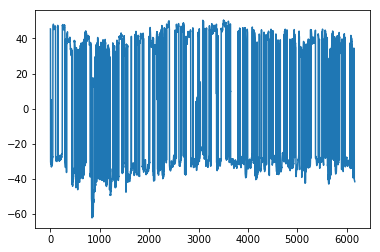

In [35]:
model.resid[0:10] # hatalar

plt.plot(model.resid) 

# ÇOKLU DOĞRUSAL REGRESYON

In [36]:
data_orj.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


col1 = ['20_target','50_target']
data_orj.drop(col1, inplace=True, axis=1)

X = data_orj.drop("90_target", axis = 1)
y = data_orj["90_target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [38]:
y.head()

0    36.997753
1    37.016198
2   -37.024805
3   -37.040483
4   -37.103503
Name: 90_target, dtype: float64

In [39]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              90_target   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     8.403
Date:                Tue, 04 Aug 2020   Prob (F-statistic):          1.19e-133
Time:                        22:27:06   Log-Likelihood:                -24308.
No. Observations:                4933   AIC:                         4.888e+04
Df Residuals:                    4803   BIC:                         4.972e+04
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          1.2419      0.893      1.391      0.164      -0.509       2.993
ind_6          0.3845      0.727      0.529      0.597      -1.041       1.810
ind_8      -3.807e+08   1.39e+08     -2.743      0.006   -6.53e+08   -1.09e+08
ind_9       3.807e+08   1.39e+08      2.743      0.006    1.09e+08    6.53e+08
ind_10      3.807e+08   1.39e+08      2.743      0.006    1.09e+08    6.53e+08
ind_12         5.2302      2.108      2.481      0.013       1.098       9.363
ind_13         0.0133      0.025      0.522      0.602      -0.037       0.063
ind_14         0.0557      0.179      0.311      0.756      -0.296       0.407
ind_15        -0.1734      0.256     -0.677      0.498      -0.676       0.329
ind_16        -0.1185      0.383     -0.309      0.757      -0.870       0.633
ind_17         0.7667      0.404      1.899      0.058      -0.025       1.558
ind_18         1.7244      0.291      5.924      0.000       1.154       2.295
ind_19         1.3042      1.378      0.947      0.344      -1.397       4.005
ind_20        -1.3667      1.113     -1.228      0.220      -3.549       0.815
ind_21         1.6033      1.309      1.225      0.221      -0.963       4.170
ind_22        -0.2259      0.338     -0.668      0.504      -0.889       0.437
ind_23        -0.2392      0.341     -0.702      0.483      -0.907       0.429
ind_25     -9.793e+05   1.05e+06     -0.928      0.353   -3.05e+06    1.09e+06
ind_26      -9.79e+05   1.05e+06     -0.928      0.353   -3.05e+06    1.09e+06
ind_27      1.954e+06   2.11e+06      0.926      0.354   -2.18e+06    6.09e+06
ind_28        -0.0004      0.012     -0.033      0.973      -0.024       0.023
ind_29        -0.0149      0.019     -0.786      0.432      -0.052       0.022
ind_30        -0.0184      0.022     -0.847      0.397      -0.061       0.024
ind_31         0.0623      0.030      2.096      0.036       0.004       0.121
ind_32        -0.0716      0.028     -2.552      0.011      -0.127      -0.017
ind_33         0.0560      0.026      2.149      0.032       0.005       0.107
ind_34        -0.0072      0.029     -0.249      0.803      -0.064       0.050
ind_35        -0.0492      0.024     -2.049      0.040      -0.096      -0.002
ind_36        -0.0029      0.018     -0.160      0.873      -0.039       0.033
ind_37         0.0856      0.018      4.750      0.000       0.050       0.121
ind_39        -0.1932      0.085     -2.287      0.022      -0.359      -0.028
ind_40        -0.3584      1.322     -0.271      0.786      -2.950       2.233
ind_41         0.1086      0.078      1.389      0.165      -0.045       0.262
ind_42         0.7461      0.397      1.878      0.061      -0.033       1.525
ind_43         0.5275      0.260      2.031      0.042       0.018       1.037
ind_44        -0.0005      0.271     -0.002      0.998      -0.531       0.530
in

In [40]:
model.summary().tables[1]

# p value küçük çıkan yani H0 reddedilen  ve betaların sıfırdan farklı ve anlamlı olduğu değişkenleri tutarak diğerlerini çıkarabilirim.
# Şuan için bunu yapmayacağım amaç lineer regresyon mantığını ve tabloyu yorumlayabilmek.

,coef,std err,t,P>|t|,[0.025,0.975]
ind_5,1.2419,0.893,1.391,0.164,-0.509,2.993
ind_6,0.3845,0.727,0.529,0.597,-1.041,1.810
ind_8,-3.807e+08,1.39e+08,-2.743,0.006,-6.53e+08,-1.09e+08
ind_9,3.807e+08,1.39e+08,2.743,0.006,1.09e+08,6.53e+08
ind_10,3.807e+08,1.39e+08,2.743,0.006,1.09e+08,6.53e+08
ind_12,5.2302,2.108,2.481,0.013,1.098,9.363
ind_13,0.0133,0.025,0.522,0.602,-0.037,0.063
ind_14,0.0557,0.179,0.311,0.756,-0.296,0.407
ind_15,-0.1734,0.256,-0.677,0.498,-0.676,0.329
ind_16,-0.1185,0.383,-0.309,0.757,-0.870,0.633


In [41]:
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,-15.179065,-35.727079,-37.103503


In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

data_1 = data.copy()

col1 = ['20_target','50_target']
data.drop(col1, inplace=True, axis=1)

X = data.drop("90_target", axis = 1)
y = data["90_target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [43]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              90_target   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     17.50
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           1.99e-37
Time:                        23:12:12   Log-Likelihood:                -24710.
No. Observations:                4933   AIC:                         4.944e+04
Df Residuals:                    4921   BIC:                         4.952e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          0.3869      0.209      1.850      0.064      -0.023       0.797
ind_6         -0.1675      0.188     -0.892      0.373      -0.536       0.201
ind_8      -3.271e+08   1.41e+08     -2.322      0.020   -6.03e+08   -5.09e+07
ind_9       3.271e+08   1.41e+08      2.322      0.020    5.09e+07    6.03e+08
ind_10      3.271e+08   1.41e+08      2.322      0.020    5.09e+07    6.03e+08
ind_12        -0.5203      0.052     -9.936      0.000      -0.623      -0.418
ind_13         0.0763      0.015      5.170      0.000       0.047       0.105
ind_14         0.1932      0.144      1.341      0.180      -0.089       0.476
ind_15        -0.1953      0.250     -0.782      0.434      -0.685       0.294
ind_16        -0.4908      0.375     -1.310      0.190      -1.225       0.244
ind_17         1.2851      0.363      3.537      0.000       0.573       1.998
ind_18         0.9838      0.226      4.359      0.000       0.541       1.426
==============================================================================
Omnibus:                       22.144   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              701.859
Skew:                           0.165   Prob(JB):                    3.92e-153
Kurtosis:                       1.182   Cond. No.                     4.65e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.21e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
model.summary().tables[1]

# p value küçük çıkan yani H0 reddedilen  ve betaların sıfırdan farklı ve anlamlı olduğu değişkenleri tutarak diğerlerini çıkarabilirim.
# Şuan için bunu yapmayacağım amaç lineer regresyon mantığını ve tabloyu yorumlayabilmek.

,coef,std err,t,P>|t|,[0.025,0.975]
ind_5,0.3869,0.209,1.850,0.064,-0.023,0.797
ind_6,-0.1675,0.188,-0.892,0.373,-0.536,0.201
ind_8,-3.271e+08,1.41e+08,-2.322,0.020,-6.03e+08,-5.09e+07
ind_9,3.271e+08,1.41e+08,2.322,0.020,5.09e+07,6.03e+08
ind_10,3.271e+08,1.41e+08,2.322,0.020,5.09e+07,6.03e+08
ind_12,-0.5203,0.052,-9.936,0.000,-0.623,-0.418
ind_13,0.0763,0.015,5.170,0.000,0.047,0.105
ind_14,0.1932,0.144,1.341,0.180,-0.089,0.476
ind_15,-0.1953,0.250,-0.782,0.434,-0.685,0.294
ind_16,-0.4908,0.375,-1.310,0.190,-1.225,0.244


In [45]:
influence = model.get_influence() 
influence

Leverag v.s. Studentized Residuals


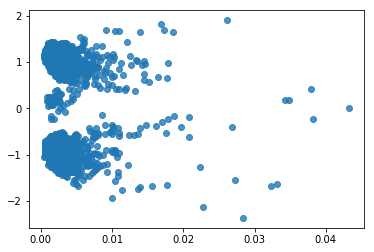

In [46]:
#normalden gelenler

resid_student = influence.resid_studentized_external 

(cooks,p)=influence.cooks_distance
(dffits,p)=influence.dffits
leverage=influence.hat_matrix_diag
print('Leverag v.s. Studentized Residuals')
sns.regplot(leverage, model.resid_pearson, fit_reg=False) #hatalarımın dağılımını görüyorum.

# errorlarimdeki outlier ' ları görmüş oluyorum en sağdakiler mesela.


# alt taraftaki gözlemleri ve sağ taraftaki gözlemleri tahmin ederken daha çok hata yapıyorum gibi yorum yapılabilir.

# mesela bu noktalara daha fazla buralara odaklanabilirim.

# buralarda gözlem arttırmayı deneyebiliriz.

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


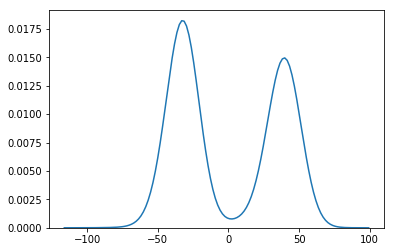

In [48]:
# error'lara test 

advres = pd.concat([data , pd.Series(model.resid, name = 'resid'), pd.Series(model.predict(), name = "predict")], axis = 1)

sns.kdeplot(np.array(advres.resid), bw=10)

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


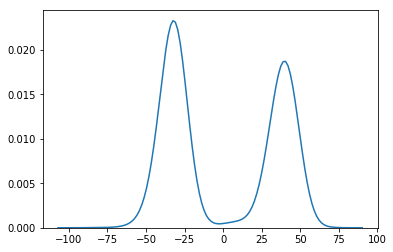

In [49]:
sns.distplot(np.array(advres.resid), hist=False)

# -100 ' e doğru aykırı gözlemleri görebiliyorum.

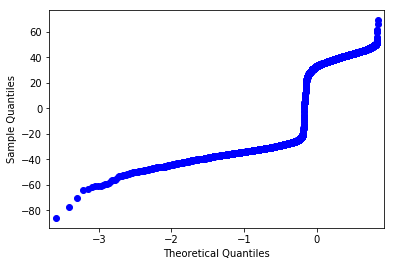

In [50]:
sm.qqplot(advres.resid)
plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


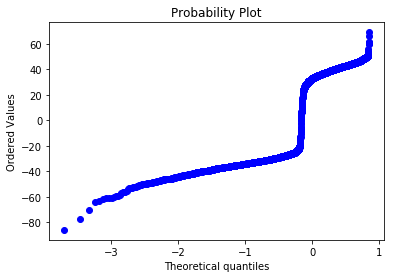

In [51]:
import pylab
stats.probplot(advres.resid, dist="norm", plot=pylab)
pylab.show()

# normalden geliyor mu? bakıyoruz.

In [52]:
 # shapiro 
from scipy.stats import shapiro

stat, p =shapiro(advres.resid)
alpha = 0.05
if p > alpha:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')


Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


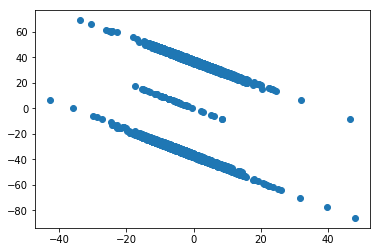

In [53]:
resid = model.resid

plt.scatter(model.predict(),resid)

In [54]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

36.269801596012066